In [1]:
from keras.layers import Convolution2D

Using TensorFlow backend.


In [2]:
from keras.layers import  MaxPooling2D

In [3]:
from keras.layers import  Flatten

In [4]:
from keras.layers import  Dense

In [5]:
from keras.models import Sequential

In [6]:
import numpy as np

In [7]:
from keras.preprocessing import image

In [8]:
img_width, img_height = 64, 64

In [9]:
model = Sequential()

In [10]:
model.add(Convolution2D(filters=32, 
                        kernel_size=(3,3), 
                        activation='relu',
                    input_shape=(64, 64, 3),
                       ))


In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.add(Flatten())

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 30752)             0         
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.add(Dense(units=128, activation='relu'))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 30752)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3936384   
Total params: 3,937,280
Trainable params: 3,937,280
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.add(Dense(units=1, activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 30752)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3936384   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 3,937,409
Trainable params: 3,937,409
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
from keras.preprocessing.image import ImageDataGenerator 

In [22]:
train_datagen = ImageDataGenerator( 
                rescale = 1. / 255, 
                 shear_range = 0.2, 
                  zoom_range = 0.2, 
            horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1. / 255)
train_generator = train_datagen.flow_from_directory('brain_tumor_dataset2/train', 
                              target_size =(64, 64), 
                     batch_size = 32, class_mode ='binary')
validation_generator = test_datagen.flow_from_directory('brain_tumor_dataset2/test', 
                   target_size =(64, 64), 
          batch_size = 32, class_mode ='binary')
model.fit_generator(train_generator, 
    steps_per_epoch = 255, 
    epochs = 10, validation_data = validation_generator, 
    validation_steps = 99)


Found 253 images belonging to 2 classes.
Found 98 images belonging to 1 classes.
Epoch 1/10
255/255 [==============================] - 96s 377ms/step - loss: 0.4377 - accuracy: 0.8127 - val_loss: 0.0858 - val_accuracy: 0.9694
Epoch 2/10
255/255 [==============================] - 95s 373ms/step - loss: 0.2049 - accuracy: 0.9219 - val_loss: 0.0846 - val_accuracy: 0.9504
Epoch 3/10
255/255 [==============================] - 95s 373ms/step - loss: 0.1154 - accuracy: 0.9598 - val_loss: 0.0197 - val_accuracy: 0.9797
Epoch 4/10
255/255 [==============================] - 95s 371ms/step - loss: 0.0617 - accuracy: 0.9797 - val_loss: 1.3763 - val_accuracy: 0.9586
Epoch 5/10
255/255 [==============================] - 95s 372ms/step - loss: 0.0576 - accuracy: 0.9804 - val_loss: 0.0068 - val_accuracy: 1.0000
Epoch 6/10
255/255 [==============================] - 95s 371ms/step - loss: 0.0350 - accuracy: 0.9897 - val_loss: 5.2473e-04 - val_accuracy: 1.0000
Epoch 7/10
255/255 [=========================

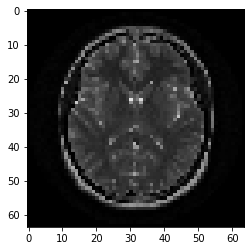

In [66]:
import matplotlib.pyplot as plt
test_image=image.load_img('brain_tumor_dataset2/train/no/1 no.jpeg',target_size=(64,64))
plt.imshow(test_image)

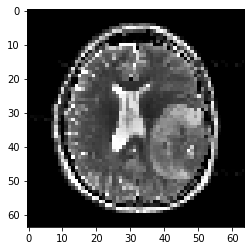

In [67]:
train_image=image.load_img('brain_tumor_dataset2/train/yes/Y108.jpg',target_size=(64,64))
plt.imshow(train_image)

In [78]:
train_image=image.img_to_array(train_image)

In [79]:
type(train_image)

numpy.ndarray

In [80]:
train_image.shape

(64, 64, 3)

In [81]:
train_image=np.expand_dims(train_image, axis=0)

In [82]:
train_image.shape

(1, 64, 64, 3)

In [83]:
model.predict(train_image)

array([[1.]], dtype=float32)

In [84]:
result=train_generator.class_indices

In [85]:
result

{'no': 0, 'yes': 1}

In [86]:
if result['no'] == 0:
    print('no tumor')
else:
    print('tumor')



no tumor
